In [121]:
from PIL import Image
from tqdm import trange
import configparser
import pandas as pd

from urllib import request
import re
import urllib.request
import os
import random
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from skimage.measure import label, regionprops
# import pandas as pd
# import numpy as np
from skimage import draw
from skimage import io
# import quadkey

In [20]:
agents = [
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.101 Safari/537.36',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/532.5 (KHTML, like Gecko) Chrome/4.0.249.0 Safari/532.5',
    'Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US) AppleWebKit/532.9 (KHTML, like Gecko) Chrome/5.0.310.0 Safari/532.9',
    'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.7 (KHTML, like Gecko) Chrome/7.0.514.0 Safari/534.7',
    'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/9.0.601.0 Safari/534.14',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.601.0 Safari/534.14',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20", "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.27 (KHTML, like Gecko) Chrome/12.0.712.0 Safari/534.27',
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.1 (KHTML, like Gecko) Chrome/13.0.782.24 Safari/535.1']


# 经纬度反算切片行列号 3857坐标系
def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)


# 下载图片
def getimg(Tpath, Spath, x, y):
    try:
        f = open(Spath, 'wb')
        req = urllib.request.Request(Tpath)
        req.add_header('User-Agent', random.choice(agents))  # 换用随机的请求头
        pic = urllib.request.urlopen(req, timeout=60)

        f.write(pic.read())
        f.close()
#         print(str(x) + '_' + str(y) + '下载成功')
    except Exception:
#         print(str(x) + '_' + str(y) + '下载失败,重试')
        getimg(Tpath, Spath, x, y)

In [40]:
fadianji=pd.read_csv('/data2/images-to-osm/fengli2.csv')
datapath='/data2/images-to-osm/tiles/fengche/'
neededTile = False
zoom = 17 
for i in trange(len(fadianji)):
    lat=fadianji.iloc[i,1]
    lon=fadianji.iloc[i,2]
#     print(lat,lon)
    x,y = deg2num(lat,lon, zoom)
    for row in range(-1,2) :
        for col in range(-1,2) :
#             print(row,col)
            newx=x+row
            newy=y+col
#             print(newx,newy)
            tilepath = "http://mt.google.cn/vt/lyrs=s&x=" + str(newx) + "&y=" + str(newy) + "&z=" + str(zoom)
            despath=os.path.join(datapath,str(newx)+'_'+str(newy)+'.png')
            if(os.path.exists(despath)):
                print('T')
            else:
                getimg(tilepath,despath, x, y)
    break



  0%|          | 0/3010 [00:00<?, ?it/s]

T
T
T
T
T
T


In [115]:
fadianji=pd.read_csv('/data2/images-to-osm/fengli2.csv')

In [9]:
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

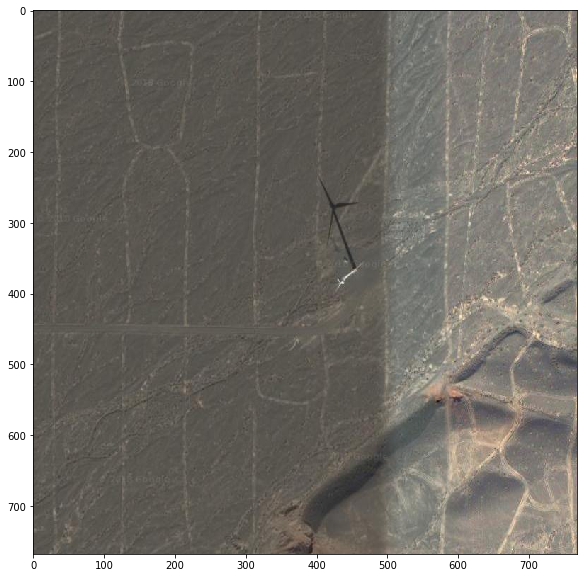

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(image)
# plt.imshow(io.imread('/data2/images-to-osm/tiles/fengche/97578_47902.png'))

In [51]:
import mercantile

In [52]:
fadianji=pd.read_csv('/data2/images-to-osm/fengli2.csv')
datapath='/data2/images-to-osm/tiles/fengche/'
neededTile = False
zoom = 17 
for i in trange(len(fadianji)):
    lat=fadianji.iloc[i,1]
    lon=fadianji.iloc[i,2]
#     print(lat,lon)
    x,y = deg2num(lat,lon, zoom)
    break

  0%|          | 0/3010 [00:00<?, ?it/s]


In [116]:
import shapely.geometry as geometry
features = {}
features['fengche']=[]

In [119]:
from math import sin, cos, atan, exp, log, pi
EARTH_RADIUS = 6378137
LATITUDE_RANGE = (-85.05112878, 85.05112878)
LONGITUDE_RANGE = (-180., 180.)
def clip(n, minMax):
    return min(max(n, minMax[0]), minMax[1])
def map_size(level):
    return 256 << level
def geo_to_pixel(lat,lon,level):
#     lat, lon = float(geo[0]), float(geo[1])
    lat = clip(lat, LATITUDE_RANGE)
    lon = clip(lon, LONGITUDE_RANGE)
    x = (lon + 180) / 360
    sin_lat = sin(lat * pi / 180)
    y = 0.5 - log((1 + sin_lat) / (1 - sin_lat)) / (4 * pi)
        # might need to cast to uint
    map_sizes = map_size(level)
    pixel_x = int(clip(x * map_sizes + 0.5, (0, map_sizes - 1)))
    pixel_y = int(clip(y * map_sizes + 0.5, (0, map_sizes- 1)))
    return pixel_x, pixel_y

In [118]:
for i in range(len(fadianji)):
    Lat,Lon = (float(fadianji.iloc[i,1]),float(fadianji.iloc[i,2]))
    pixel =geo_to_pixel(Lat,Lon,17)
    pts = []
    for x in [-1,1]:
        pixelnew=(pixel[0]-60,pixel[1]+x*60)
        pts.append(pixelnew)
    for x in [1,-1]:
        pixelnew=(pixel[0]+60,pixel[1]+x*60)
        pts.append(pixelnew)  
#     print(pts)
    poly = geometry.Polygon(pts)
    areaMeters = poly.area
    feature = {"geometry" : poly,"area":areaMeters}
    features['fengche'].append( feature )
#     break

In [122]:
tileRootDir='/data2/images-to-osm/tiles/fengche/'
labeldata=[]
for i in trange(len(fadianji)):
    filename= '%06d'%(i+1)+'.jpg'
    lat=fadianji.iloc[i,1]
    lon=fadianji.iloc[i,2]
    m,n = deg2num(lat,lon, zoom)
    maxImageSize = 256*3
    maxTileCount = maxImageSize // 256
#     count = 0
    image = np.zeros([maxImageSize,maxImageSize,3],dtype=np.uint8)
    for x in range(-1,2) :
        for y in range(-1,2) :
            newx=m+x
            newy=n+y
#             tilepath = "http://mt.google.cn/vt/lyrs=s&x=" + str(newx) + "&y=" + str(newy) + "&z=" + str(zoom)
            tileFileName=os.path.join(datapath,str(newx)+'_'+str(newy)+'.png')
#             tileFileName = "%s/%s.jpg" % (tileCacheDir, qkStr)
            if os.path.exists(tileFileName):
#                 print(x,y)
                try:
                    image[ (y+1)*256 : (y+2)*256, (x+1)*256 : (x+2)*256,0:3 ] = io.imread(tileFileName )
#                     count += 1
                except:
                    print(tileFileName)
#                     os.remove(tileFileName)
#                     tilepath = "http://mt.google.cn/vt/lyrs=s&x=" + str(newx) + "&y=" + str(newy) + "&z=" + str(zoom)
#                     despath=tileFileName
#                     if(os.path.exists(despath)):
#                         print('T')
#                     else:
#                         getimg(tilepath,despath, x, y)
                    
    io.imsave(os.path.join('/data2/fengche/train/',filename),image)

#     qk = quadkey.from_geo((float(lat),float(lon)),17)
    topleft=mercantile.ul(mercantile.tile(lon,lat,17))
    tilePixel = geo_to_pixel(topleft[1],topleft[0],17)
    pts = []
#     half=384
    pts.append( ( tilePixel[0]-256,tilePixel[1]-256) )
    pts.append( ( tilePixel[0]-256,tilePixel[1]+256 ) )
    pts.append( ( tilePixel[0]+512,tilePixel[1]+512 ) )
    pts.append( ( tilePixel[0]+512,tilePixel[1]-512 ) )
    imageBoundingBoxPoly = geometry.Polygon(pts)
    featureMask = np.zeros((maxImageSize, maxImageSize), dtype=np.uint8)
    for featureType in features :
        featureCount = 1
        for feature in features[featureType] :
            if (imageBoundingBoxPoly.intersects( feature['geometry']) ) :
#                 print('here')
                xs, ys = feature['geometry'].exterior.coords.xy
                xs = [ x-tilePixel[0]+256 for x in xs]
                ys = [ y-tilePixel[1]+256 for y in ys]
    
                xsClipped = [ min( max( x,0),maxImageSize) for x in xs]
                ysClipped = [ min( max( y,0),maxImageSize) for y in ys]

                pts2 = []
                for i in range(len(xs)) :
                    pts2.append( (xsClipped[i],ysClipped[i] ) )

                clippedPoly = geometry.Polygon(pts2)
                rr, cc = draw.polygon(xs,ys,(maxImageSize,maxImageSize))
                featureMask[cc,rr] = featureCount
                featureCount=featureCount+1
    bboxes = []
    labels=[]
    for region in regionprops(featureMask):
        bboxski=np.asanyarray(region.bbox)
        bbox=np.zeros_like(bboxski)
        bbox[0]=bboxski[1]
        bbox[1]=bboxski[0]
        bbox[2]=bboxski[3]
        bbox[3]=bboxski[2]
        if(bbox[0]<0):bbox[0]=0
        if(bbox[1]<0):bbox[1]=0
        if(bbox[2]>767):bbox[2]=767
        if(bbox[3]>767):bbox[3]=767      
        bboxes.append(bbox)
        labels.append(1)
    if not bboxes:
        bboxes = np.zeros((0, 4))
        labels = np.zeros((0, ))
    else:
        bboxes = np.array(bboxes, ndmin=2)
#         bboxes = np.array(bboxes, ndmin=2) - 1
        labels = np.array(labels)
    if(len(bboxes)>0):
        bboxes_ignore = np.zeros((0, 4))
        annotation = {
        'filename':filename,
#         'image':image,
        'width': 768,
        'height': 768,
        'ann': {
            'bboxes': bboxes.astype(np.float32),
            'labels': labels.astype(np.int64),
            'bboxes_ignore':bboxes_ignore.astype(np.float32)}
        }
        labeldata.append(annotation)

100%|██████████| 3010/3010 [05:11<00:00,  8.35it/s]


In [123]:
labeldata[0]

{'filename': '000001.jpg',
 'width': 768,
 'height': 768,
 'ann': {'bboxes': array([[394., 306., 514., 426.]], dtype=float32),
  'labels': array([1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32)}}

In [124]:
import mmcv

In [127]:
mmcv.dump(labeldata,'/data2/fengche/annotations/annotations.pkl')

In [2]:


#找结果

In [3]:
import numpy as np
import mercantile
from affine import Affine

from rasterio import features

In [4]:
def project_geom(geom):
    return {
        'type': geom['type'],
        'coordinates': [
            [mercantile.xy(*coords) for coords in part]
            for part in geom['coordinates']
        ]
    }

In [71]:
import geopandas as gpd

In [88]:
xx=gpd.read_file('./shp/乌兰察布.shp')

In [89]:
xx=xx.to_crs({'init': 'epsg:3857'})

In [90]:
xx.bounds

,minx,miny,maxx,maxy
0,1.255641e+07,4.912090e+06,1.266684e+07,4.982193e+06
1,1.257984e+07,5.000570e+06,1.261489e+07,5.045268e+06
2,1.259510e+07,5.055425e+06,1.271855e+07,5.182178e+06
3,1.254584e+07,5.022303e+06,1.263553e+07,5.159248e+06
4,1.228201e+07,5.040725e+06,1.257855e+07,5.369683e+06
5,1.245991e+07,5.015085e+06,1.256310e+07,5.135810e+06
6,1.255647e+07,4.964884e+06,1.265237e+07,5.044191e+06
7,1.264026e+07,5.103198e+06,1.277978e+07,5.205271e+06
8,1.261815e+07,4.932338e+06,1.270466e+07,5.078814e+06
9,1.245044e+07,4.959942e+06,1.257411e+07,5.050996e+06


In [91]:
def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

In [92]:
deg2num(43.517815,88.010858,17)

(97579, 47903)

In [95]:
import mercantile

In [107]:
i=0
a=mercantile.lnglat(xx.bounds.iloc[i,0],xx.bounds.iloc[i,1])
b=mercantile.lnglat(xx.bounds.iloc[i,2],xx.bounds.iloc[i,3])

In [109]:
bound=[a.lng,a.lat,b.lng,b.lat]

In [117]:
tiles=[f for f in mercantile.tiles(a.lng,a.lat,b.lng,b.lat,17)]

In [119]:
import csv

In [127]:
xx=pd.DataFrame(tiles)

In [128]:
xx.to_csv('tiles.csv',index=False)

In [129]:
xx=pd.read_csv('tiles.csv')

In [130]:
xx.head()

,x,y,z
0,106603,49240,17
1,106603,49241,17
2,106603,49242,17
3,106603,49243,17
4,106603,49244,17


In [134]:
for i in range(len(xx)):
    x=xx.iloc[i,0]
    y=xx.iloc[i,1]
    print(x)
    break

106603
